# **Signals and Systems Project Report**

## Delivered to: **Dr. Michael Melek Abdel-Sayed**
## By: **Ahmed Alaa Al-Din Mohammed** (9220065) - **Abd El-Rahman Mostafa Gomaa** (9220475)

## 1. Project Description

### Describing the functions' logic 

#### i - show(img , width)
&nbsp;&nbsp; - The function takes the image and the desired width as an input

&nbsp;&nbsp; - We convert the image from BGR color space to RGB color space using OpenCV's cvtColor function to ensure correct color representation for Matplotlib.

&nbsp;&nbsp; - We create a Matplotlib figure with the desired width and calculated height, hides the axis, and displays the image using Matplotlib's imshow function.

#### ii - show_seperate_colors(img , width)
&nbsp;&nbsp; - It it similar to function "show", but the difference is that this function displays the image with separate color channels:
&nbsp;**# Blue**
&nbsp;**# Green**
&nbsp;**# Red**

&nbsp;&nbsp; - By the using of function **split** which is provided by openCV, we split the image into its all color components

&nbsp;&nbsp; - Then, we make separate images for each color channel, then we merge each with a blank channel for the needed isolation

&nbsp;&nbsp; - At the end, we show each image in RGB format, and display those triplet in three sub-plots

#### iii - compress(img , m)
&nbsp;&nbsp; - The image (img) passed will be separated to three different colors channels using function **split**

&nbsp;&nbsp; - We then compress each image by a certain threshold **m** that is the size of the upper-left part corner of the 8x8 main image, and apply the **Discrete Cosine Transformation DCT**.

&nbsp;&nbsp; - We then merge all the three compressed images to a single component to get the final compressed image

#### iv - _compress_components(comp_arr , m)
&nbsp;&nbsp; - The function takes an array of BGR components (images) to be compressed based on a specific threshold (m)

&nbsp;&nbsp; - It is a helper function that is used to compress each image (component) passed to the function, and call the function **_compress_single_components**

#### v - _compress_single_component(org_comp , m)
&nbsp;&nbsp; - It is other helper function that is specific to compress the certain single passed component within a specific threshold

&nbsp;&nbsp; - It divides the component into smaller matrices (8x8 blocks) and applies calls function **filter_frequencies** that utilizes the **DCT** concept

&nbsp;&nbsp; - At the end, we apply the inverse direct cosine transformation **IDCT** to reconstruct the compressed components, and return it from the function

#### vi - filter_frequencies(matrix , m)
&nbsp;&nbsp; - The function applies the **DCT** that make frequency filtering

&nbsp;&nbsp; - It computes the **DCT** of the input matrix using OpenCV's **dct** function

&nbsp;&nbsp; - It preserves the lower frequency components (up to m coefficients) and sets the rest to zero of the rest pixels

&nbsp;&nbsp; - Finally, we calculate the **IDCT** of the modified matrix to obtain the filtered image

#### vii - psnr(original_image , compressed_image , max_val=255.0)
&nbsp;&nbsp; - This function calculates the **Peak Signal-to-Noise Ratio (PSNR)** between the original and compressed images

&nbsp;&nbsp; - It computes the **Mean Squared Error (MSE)** for each color channel using the **mse** function

&nbsp;&nbsp; - It converts **MSE** to **PSNR** using the formula **PSNR=10×log⁡10(max_val^2/MSE)** for each channel

#### viii - mse(matrix1 , matrix2)
&nbsp;&nbsp; - This function calculates the **Mean Squared Error (MSE)** between two matrices

&nbsp;&nbsp; - It computes the squared difference between corresponding elements of the input matrices

&nbsp;&nbsp; - It averages the squared differences across all elements and color channels

#### ix - get_image_size_mb(file_path)
&nbsp;&nbsp; - The function returns the size of an image file in megabytes

&nbsp;&nbsp; - It uses the **os.path.getsize** function to get the size of the image file in bytes

&nbsp;&nbsp; - The function returns the size of an image file in megabytes 

#### x - run_test(img, m, path)
&nbsp;&nbsp; - The function that utilizes all of the above function

&nbsp;&nbsp; - It compresses the passed image, and calculates it **PSNR** value

&nbsp;&nbsp; - At the end, the function dipslays the compressed image, and returns the **PSNR** value

## 2. Results

### i- Quality Measurement Plotting
&nbsp;&nbsp; . **First plot using graph plot** [QualityMeasurement1](#first-plot)

&nbsp;&nbsp; - The plot describes **PSNR** values of each decompressed image for each value of the threshold **m**

&nbsp;&nbsp; . **Second plot using bar-chart plot** [QualityMeasurement2](#second-plot)

&nbsp;&nbsp; - The plot describes **PSNR** values of each decompressed image for each value of the threshold **m**

&nbsp;&nbsp; (PSNR Values):

&nbsp;&nbsp;[Compressed Image 1](#image-with-m1) -> 31.49392149101377

&nbsp;&nbsp;[Compressed Image 2](#image-with-m3)->  32.07891371521024

&nbsp;&nbsp;[Compressed Image 3](#image-with-m3)->  32.57781104477598

&nbsp;&nbsp;[Compressed Image 4](#image-with-m4)->  33.23126883422414

### ii - Compressed Image Sizes Plotting
&nbsp;&nbsp; . **Bar-Chart plot for sizes of the images after being filtered** [Image Sizes](#ii---image-sizes)

&nbsp;&nbsp; (Images Sizes):

&nbsp;&nbsp;[Original Image](#original-image) -> 3.42264366

&nbsp;&nbsp;[Compressed Image 1](#image-with-m1)->  1.03941536

&nbsp;&nbsp;[Compressed Image 2](#image-with-m2)->  2.44290829

&nbsp;&nbsp;[Compressed Image 3](#image-with-m3)->  2.83476448

&nbsp;&nbsp;[Compressed Image 4](#image-with-m4)->  3.0393095

## 3. Images and Figures

### i - Quality Measurement
#### First plot 

![QualityMeasurement1](imgs/QualityMeasurement.png)

#### Second Plot 

![QualityMeasurement2](imgs/QualityMeasurement2.png)

### ii - Image Sizes

#### The plot 

![Image Sizes](imgs/ImageSizes.png)


### iii - Compressed Images

#### Original Image
![Original Image](imgs/image1.png)

#### Image with m=1
![Compressed Image 1](imgs/image_r1.png)

#### Image with m=2
![Compressed Image 2](imgs/image_r2.png)

#### Image with m=3
![Compressed Image 3](imgs/image_r3.png)

#### Image with m=4
![Compressed Image 4](imgs/image_r4.png)

### iv - Colors-Separated Images
![Separated Colors](imgs/SeparatedColours.png)

## 4. Code

### Image Compression

#### Importing dependencies

In [9]:
# will be use to handle image processing
import cv2 as cv
import numpy as np
# used to show the results
from matplotlib import pyplot as plt
# used to get the image sizes
import os

#### show an image with the desired width

In [8]:
def show(img, width):
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Set desired width and aspect ratio preservation
    desired_width = width  # Adjust this value for your desired width

    # Calculate height based on image aspect ratio and desired width
    img_height, img_width, _ = img_rgb.shape  # Get image height and width
    aspect_ratio = img_height / img_width
    new_height = desired_width * aspect_ratio

    # Create figure with desired width and calculated height
    plt.figure(figsize=(desired_width, new_height))

    # Hide axis and adjust layout for full width
    plt.axis("off")
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # Display the image
    plt.imshow(img_rgb)
    plt.show()

#### Show image components

In [7]:
def show_seperate_colors(img, width):
    # get the image components
    b, g, r = cv.split(img)
    # create a blank matrix
    blank = np.zeros(img.shape[:2], dtype="uint8")
    # create the three image components
    blue = cv.merge([b, blank, blank])
    green = cv.merge([blank, g, blank])
    red = cv.merge([blank, blank, r])
    # convert the colors to use pyplot
    blue_rgb = cv.cvtColor(blue, cv.COLOR_BGR2RGB)
    green_rgb = cv.cvtColor(green, cv.COLOR_BGR2RGB)
    red_rgb = cv.cvtColor(red, cv.COLOR_BGR2RGB)
    # Set desired width and aspect ratio preservation
    desired_width = width  # Adjust this value for your desired width

    # Calculate height based on image aspect ratio and desired width
    img_height, img_width, _ = blue_rgb.shape  # Get image height and width
    aspect_ratio = img_height / img_width
    new_height = desired_width * aspect_ratio

    fig, axes = plt.subplots(1, 3, figsize=(desired_width, new_height))

    # Display each image on a separate subplot
    axes[0].imshow(blue_rgb)
    axes[0].axis("off")  # Hide axes for cleaner presentation (optional)

    axes[1].imshow(green_rgb)
    axes[1].axis("off")  # Hide axes for cleaner presentation (optional)

    axes[2].imshow(red_rgb)
    axes[2].axis("off")  # Hide axes for cleaner presentation (optional)

    # Display the images
    plt.show()

#### The compressing functions

##### The main compressing function


In [6]:
def compress(img, m):
    #     img_float32 = np.float32(img)
    b, g, r = cv.split(img)
    compressed_image_components_compress = _compress_components([b, g, r], m)
    compressed_image_compress = cv.merge(compressed_image_components_compress)
    return compressed_image_compress

##### Compress color components of the image

In [5]:
def _compress_components(comp_arr, m):
    filtered_array = []
    for comp in comp_arr:
        filtered_array.append(_compress_single_component(comp, m))
    return filtered_array

##### Compress a single image component

In [14]:
def _compress_single_component(org_comp, m):
    comp = org_comp.copy()
    rows, columns = comp.shape
    rows_matrices, columns_matrices = int(rows / 8), int(columns / 8)
    for i in range(0, rows_matrices):
        for j in range(0, columns_matrices):
            small_matrix = comp[i * 8 : (i + 1) * 8, j * 8 : (j + 1) * 8]
            comp[i * 8 : (i + 1) * 8, j * 8 : (j + 1) * 8] = filter_frequencies(
                small_matrix, m
            )
    return comp

##### Take 8\*8 matrix and give the resulted m\*m 

In [15]:
def filter_frequencies(matrix, m):
    matrix_float32 = np.float32(matrix)
    transformed = cv.dct(matrix_float32)
    ones = np.ones(matrix.shape)
    ones = ones * 0.1
    ones[0:m, 0:m] = transformed[0:m, 0:m]
    filtered = cv.idct(ones)
    filtered[filtered > 255.0] = 255.0
    filtered[filtered < 0.0] = 0.0
    return filtered

##### Statistics functions

In [11]:
def psnr(original_image, compressed_image, max_val=255.0):
    mse_per_channel = mse(original_image, compressed_image)
    psnr_per_channel = 10 * np.log10(max_val**2 / np.array(mse_per_channel))
    return np.mean(psnr_per_channel)

In [12]:
def mse(matrix1, matrix2):
    mse_per_channel = np.mean((matrix1 - matrix2) ** 2, axis=(0, 1))
    return mse_per_channel.tolist()  # Convert to list for easier handling

##### Get the image file size

In [16]:
def get_image_size_mb(file_path):
    # Get the size of the image file in bytes
    size_in_bytes = os.path.getsize(file_path)
    # Convert bytes to megabytes (1 MB = 1024 * 1024 bytes)
    size_in_mb = size_in_bytes / (1024 * 1024)
    return size_in_mb

##### Show a result


In [17]:
def run_test(img, m, path):
    result = compress(img, m)
    cv.imwrite(path, result)
    psnr_array.append(psnr(img, result))
    img_sizes.append(get_image_size_mb(path))
    show(result, 14)
    return

#### Carrying Tests

In [18]:
path = "./imgs/image1.png"
img = cv.imread(path)
psnr_array = []
img_sizes = []
img_sizes.append(get_image_size_mb(path))

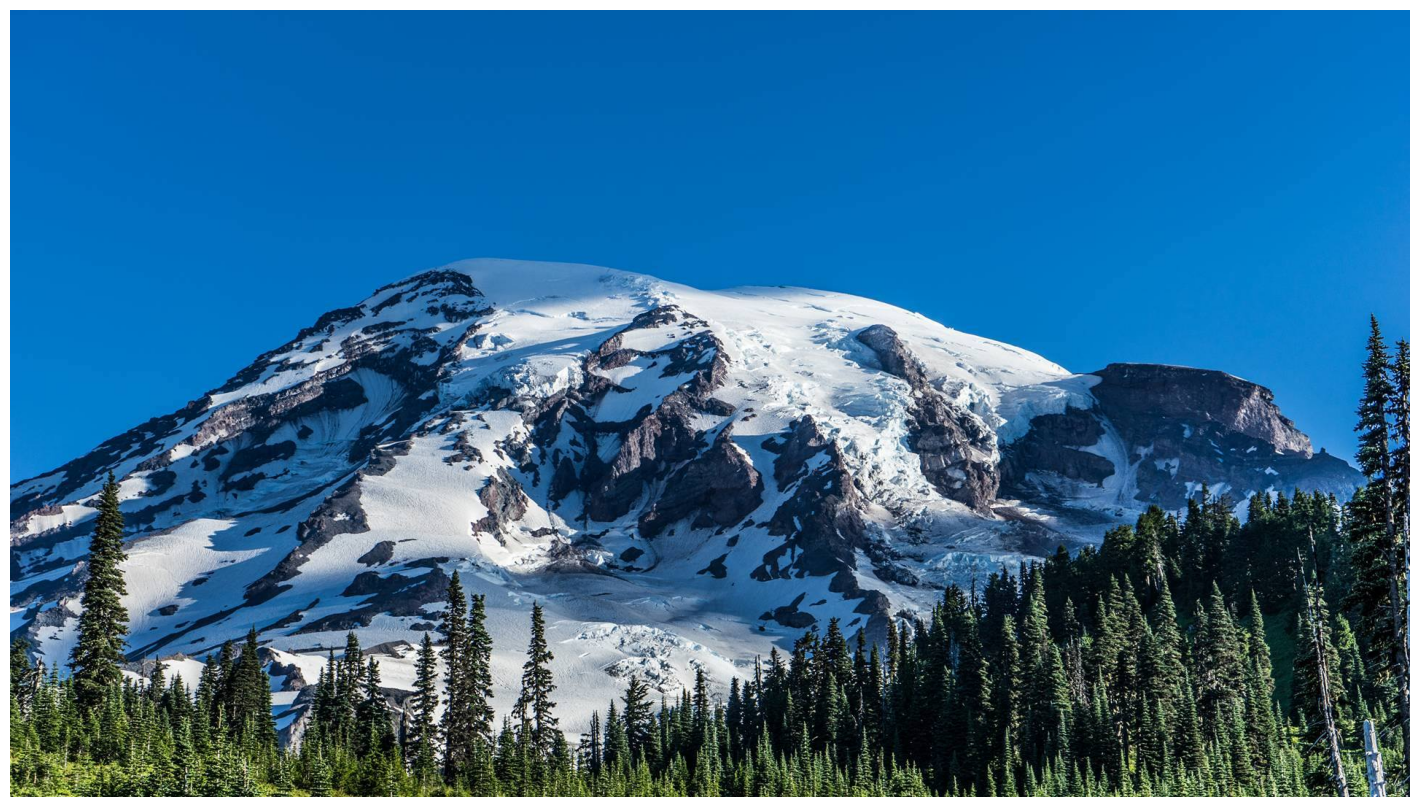

In [19]:
show(img, 14)

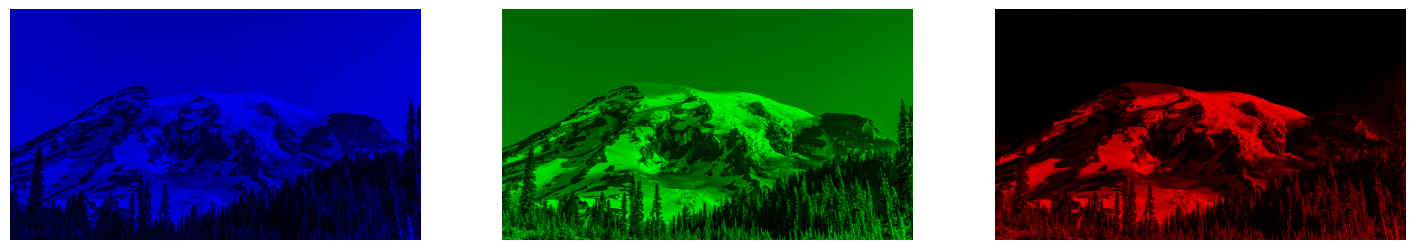

In [20]:
show_seperate_colors(img, 18)

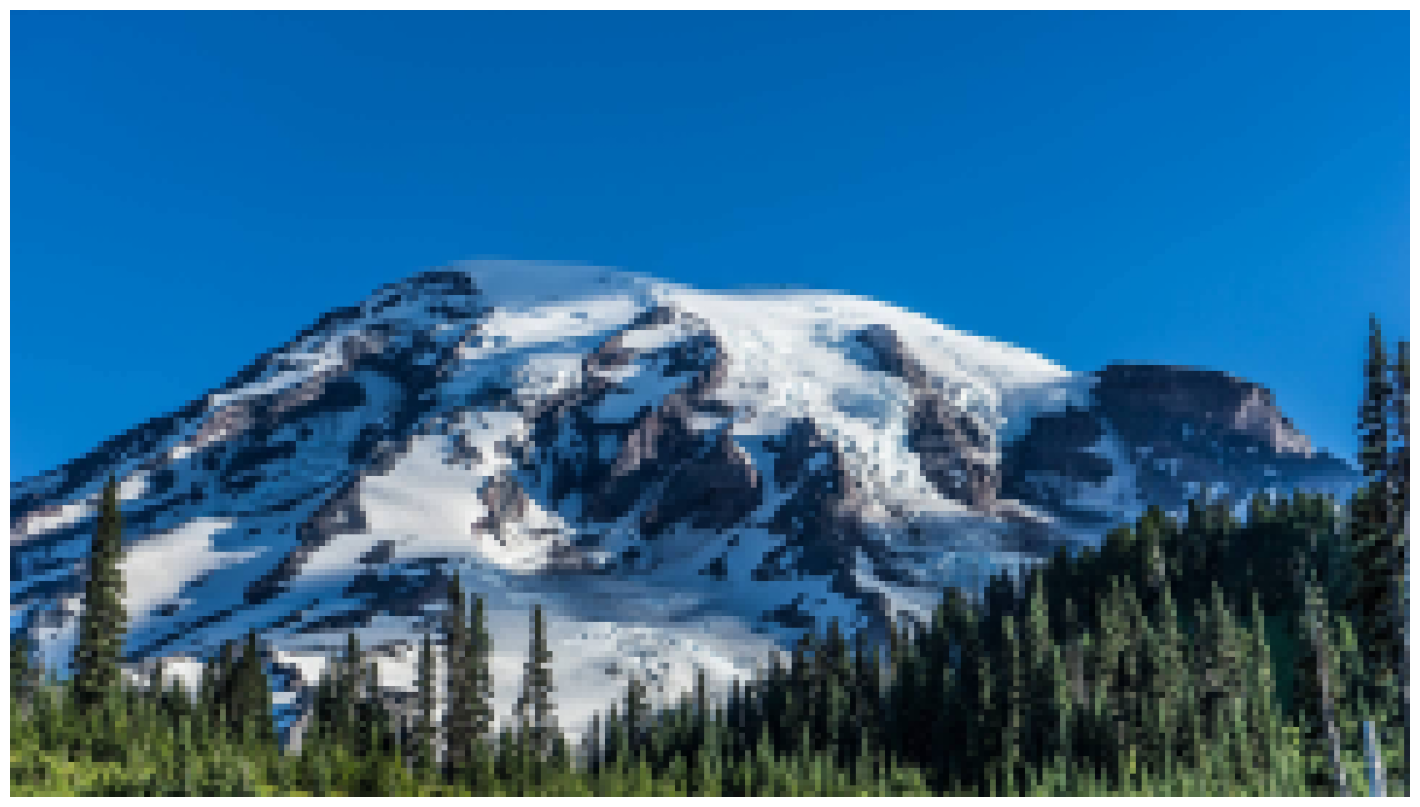

In [21]:
run_test(img, 1, "./imgs/image_r1.png")

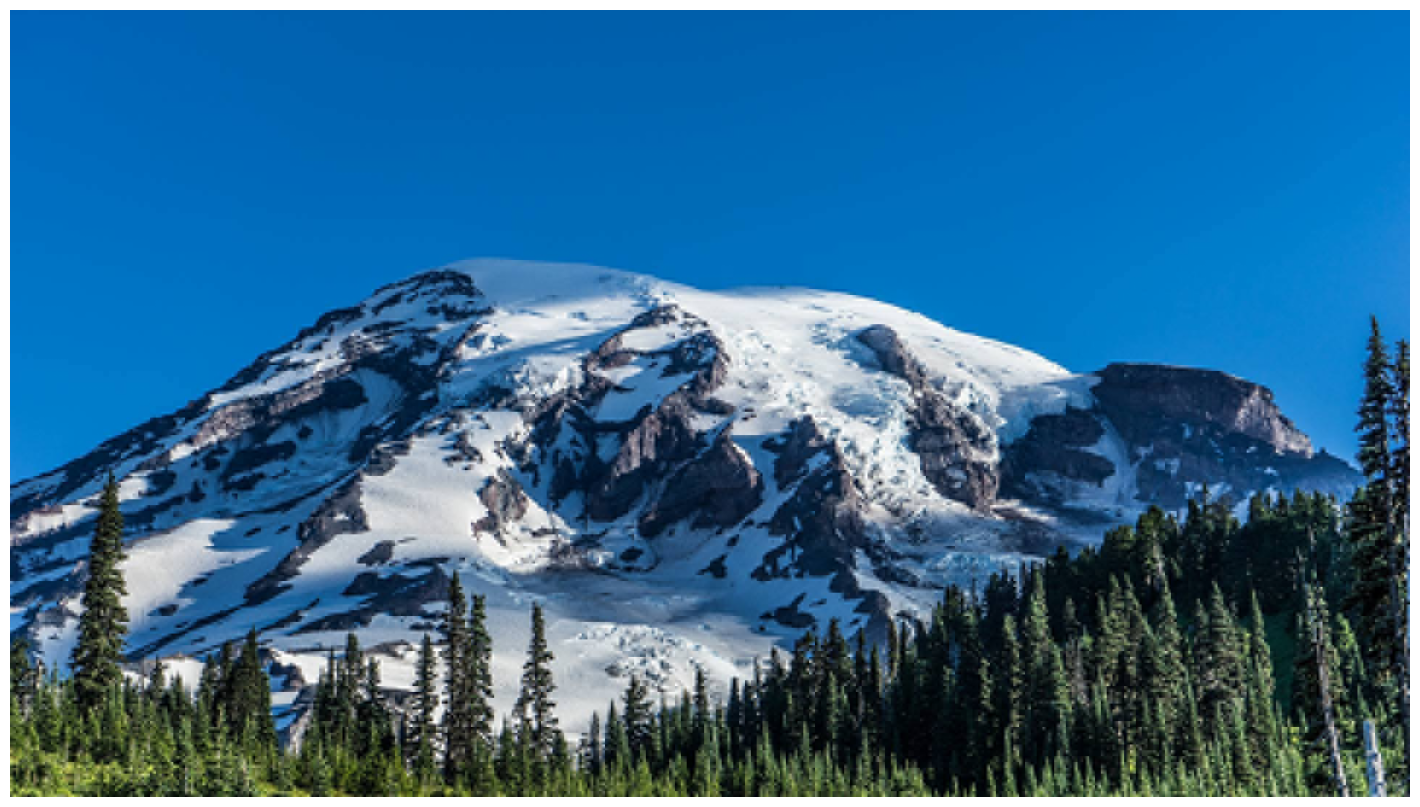

In [22]:
run_test(img, 2, "./imgs/image_r2.png")

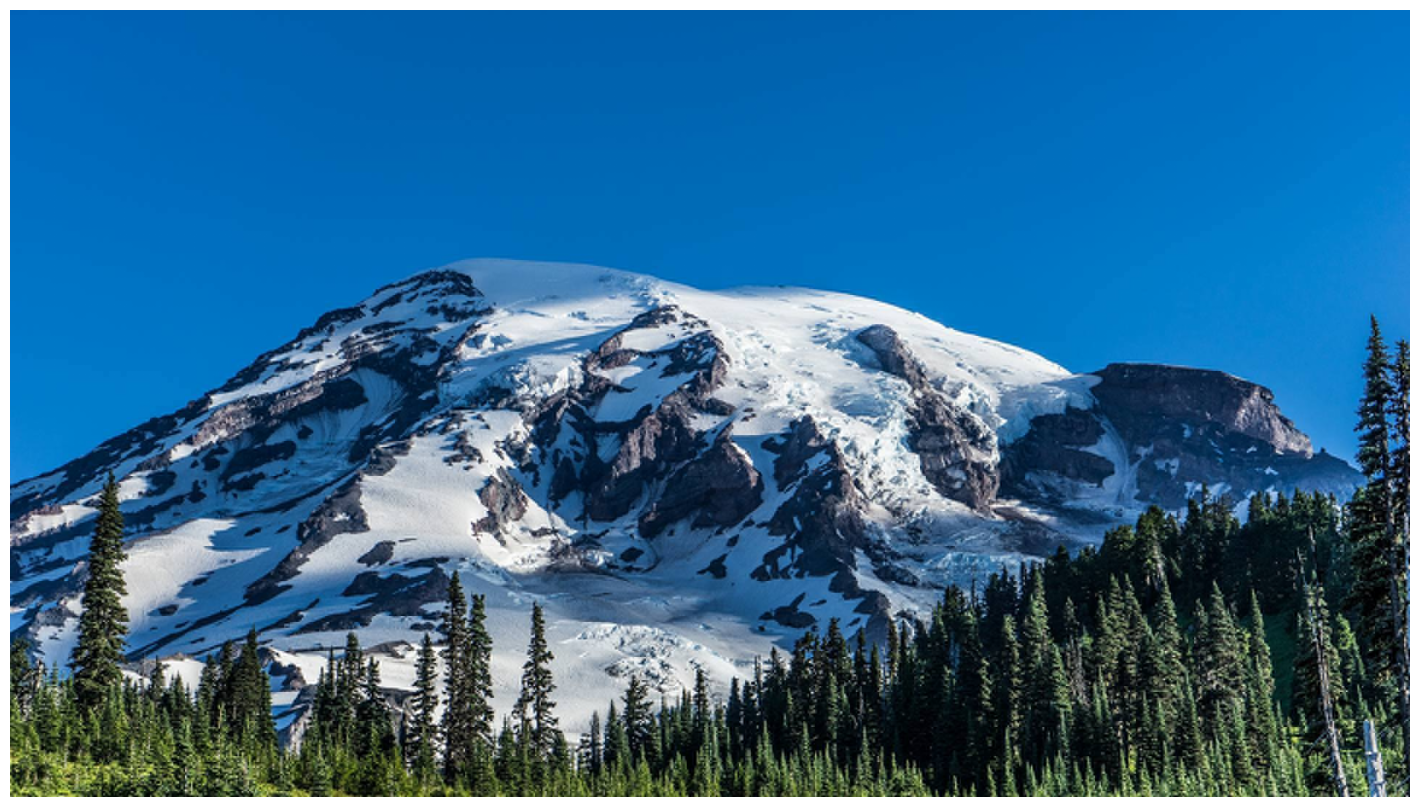

In [23]:
run_test(img, 3, "./imgs/image_r3.png")

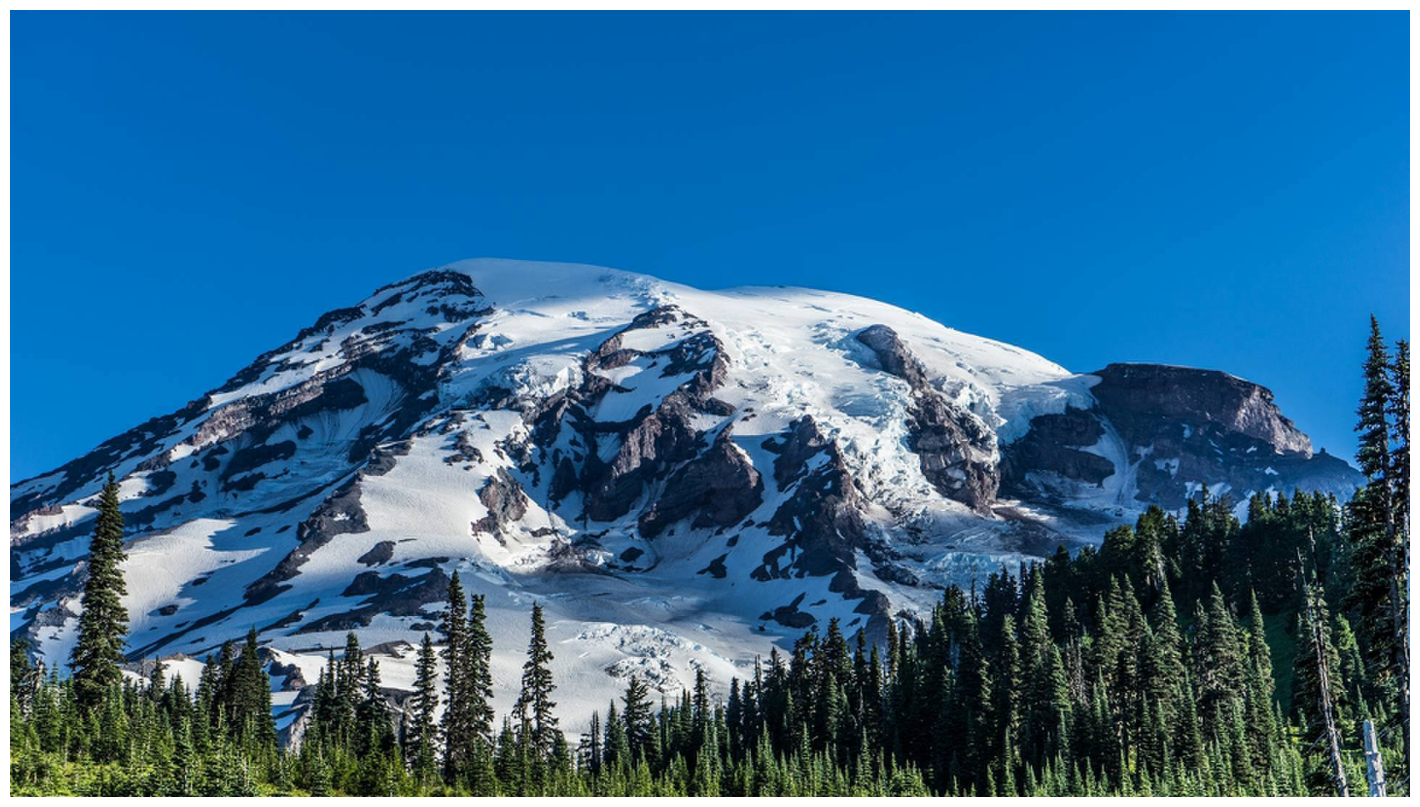

In [24]:
run_test(img, 4, "./imgs/image_r4.png")

##### PSNR graph

In [25]:
y = np.array(psnr_array)
x = np.array(["m = 1", "m = 2", "m = 3", "m = 4"])

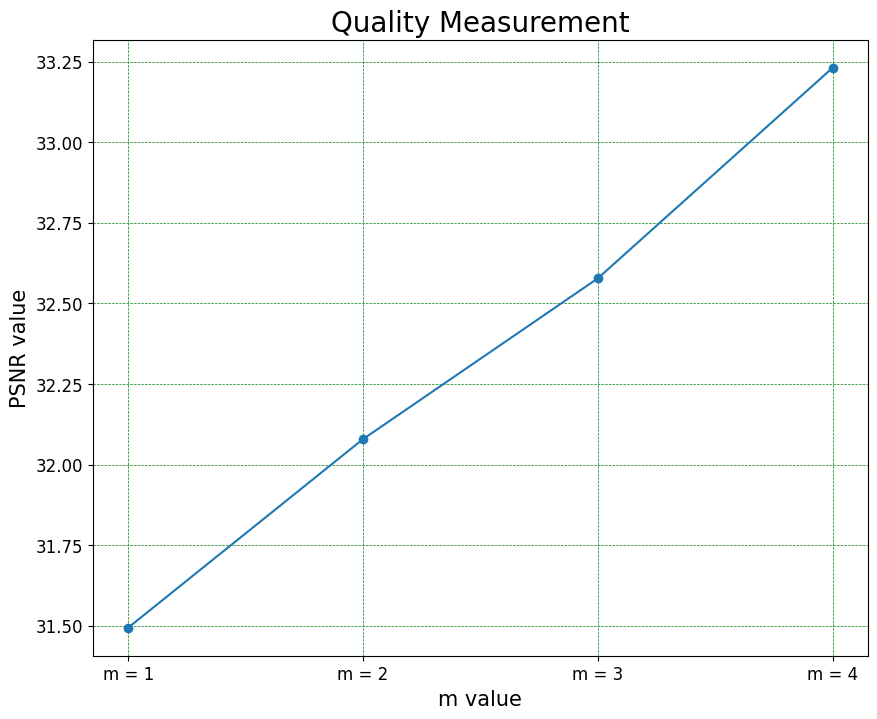

In [26]:
plt.figure(figsize=(10, 8))
plt.title("Quality Measurement", size=20)
plt.xlabel("m value", size=15)
plt.ylabel("PSNR value", size=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color="green", linestyle="--", linewidth=0.5)
plt.plot(x, y, marker="o")
plt.show()

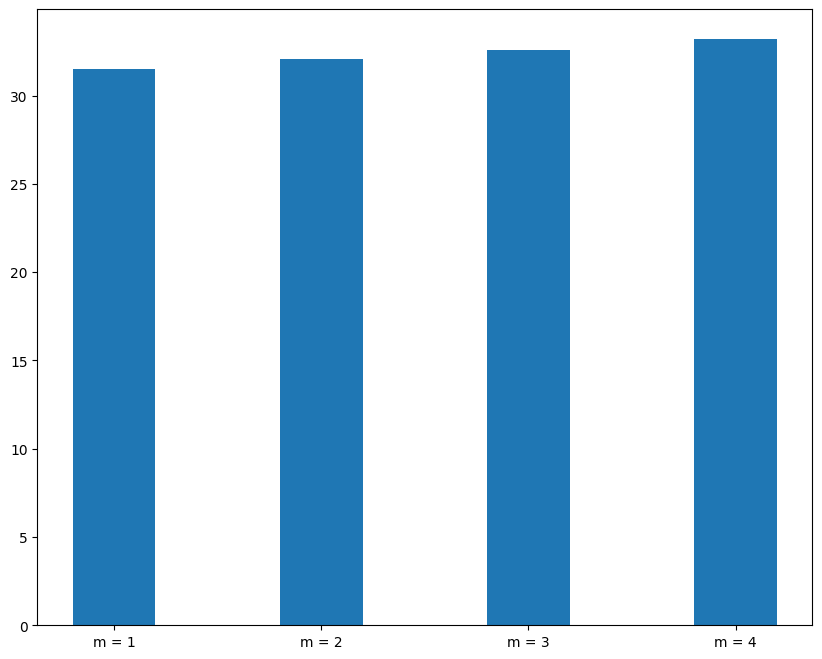

In [27]:
plt.figure(figsize=(10, 8))
plt.bar(x, y, width=0.4)

plt.show()

In [28]:
bar_name = np.array(["original", "m = 1", "m = 2", "m = 3", "m = 4"])
size = np.array(img_sizes)
print(size)

[3.42264366 1.03941536 2.44290829 2.83476448 3.0393095 ]


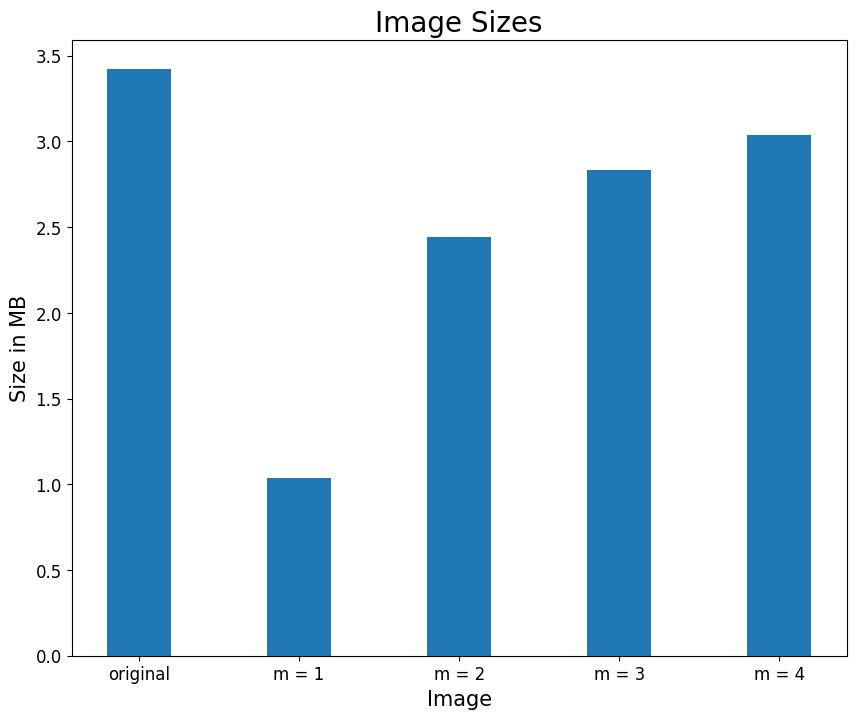

In [29]:
plt.figure(figsize=(10, 8))
plt.title("Image Sizes", size=20)
plt.xlabel("Image", size=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Size in MB", size=15)
plt.bar(bar_name, size, width=0.4)

plt.show()

In [30]:
print(psnr_array)

[31.49392149101377, 32.07891371521024, 32.57781104477598, 33.23126883422414]
